# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [37]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [38]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')

### Step 3. Assign it to a variable apple

In [39]:
apple = data
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [40]:
for col in apple.columns:
    print(apple[col].dtype)

object
float64
float64
float64
float64
int64
float64


### Step 5. Transform the Date column as a datetime type

In [41]:
apple.Date = pd.to_datetime(apple.Date)
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 6.  Set the date as the index

In [42]:
apple = apple.set_index('Date')
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [43]:
print(apple.index.duplicated())
print(True in apple.index.duplicated())
#Nope

[False False False ... False False False]
False


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [44]:
apple = apple.sort_index()
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [45]:
year = 1980
endyear=2014
month=12
endmonth =8
lastdays = []
while year != endyear or month != endmonth:
    lastdays.append(apple.loc['{}-{}'.format(year, '0'*(len(str(month))-2)+str(month))].index[-1])
    month += 1
    if month > 12:
        month -= 12
        year += 1
lastdays

[Timestamp('1980-12-31 00:00:00'),
 Timestamp('1981-01-30 00:00:00'),
 Timestamp('1981-02-27 00:00:00'),
 Timestamp('1981-03-31 00:00:00'),
 Timestamp('1981-04-30 00:00:00'),
 Timestamp('1981-05-29 00:00:00'),
 Timestamp('1981-06-30 00:00:00'),
 Timestamp('1981-07-31 00:00:00'),
 Timestamp('1981-08-31 00:00:00'),
 Timestamp('1981-09-30 00:00:00'),
 Timestamp('1981-10-30 00:00:00'),
 Timestamp('1981-11-30 00:00:00'),
 Timestamp('1981-12-31 00:00:00'),
 Timestamp('1982-01-29 00:00:00'),
 Timestamp('1982-02-26 00:00:00'),
 Timestamp('1982-03-31 00:00:00'),
 Timestamp('1982-04-30 00:00:00'),
 Timestamp('1982-05-28 00:00:00'),
 Timestamp('1982-06-30 00:00:00'),
 Timestamp('1982-07-30 00:00:00'),
 Timestamp('1982-08-31 00:00:00'),
 Timestamp('1982-09-30 00:00:00'),
 Timestamp('1982-10-29 00:00:00'),
 Timestamp('1982-11-30 00:00:00'),
 Timestamp('1982-12-31 00:00:00'),
 Timestamp('1983-01-31 00:00:00'),
 Timestamp('1983-02-28 00:00:00'),
 Timestamp('1983-03-31 00:00:00'),
 Timestamp('1983-04-

### Step 10.  What is the difference in days between the first day and the oldest

In [46]:
print(apple.index[-1] - apple.index[0])

12261 days 00:00:00


### Step 11.  How many months in the data we have?

In [47]:
print(len(lastdays))

404


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

Text(0, 0.5, 'Adj Close')

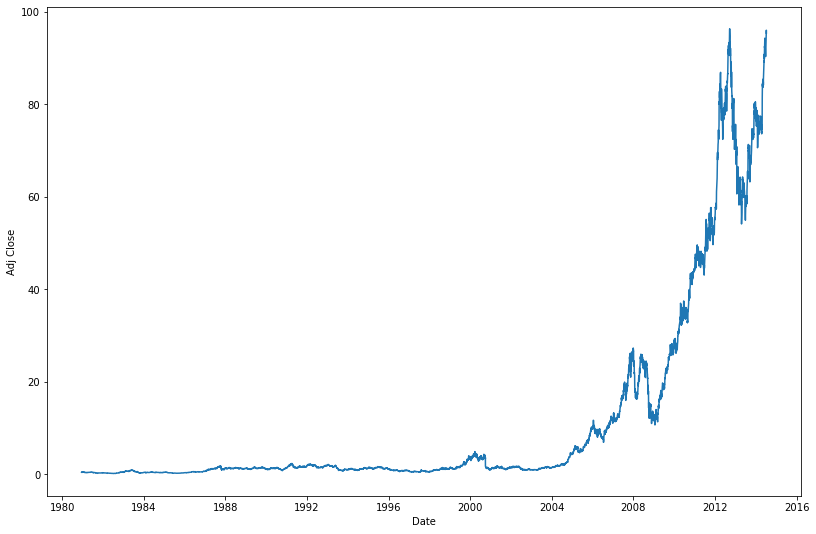

In [48]:
plt.subplots(figsize=(13.5, 9))
plt.plot(apple.index, apple['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adj Close')

### BONUS: Create your own question and answer it.

Text(0, 0.5, 'Volume')

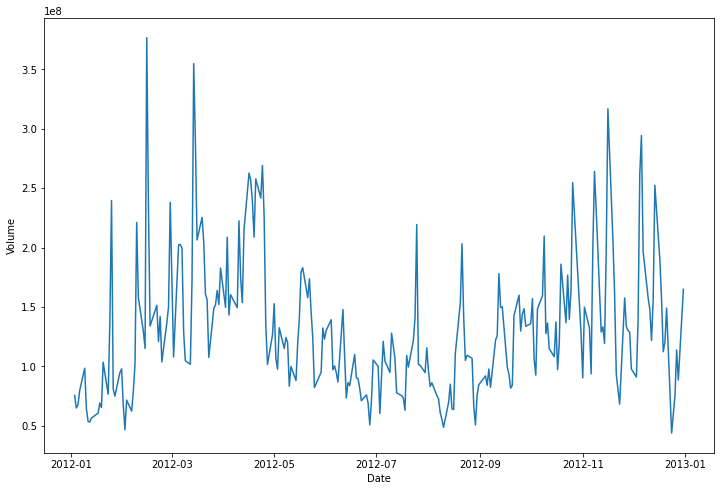

In [52]:
#Plot volume for the 2012 year
plt.subplots(figsize=(12, 8))
plt.plot(apple.loc['2012'].index, apple.loc['2012'].Volume)
plt.xlabel('Date')
plt.ylabel('Volume')

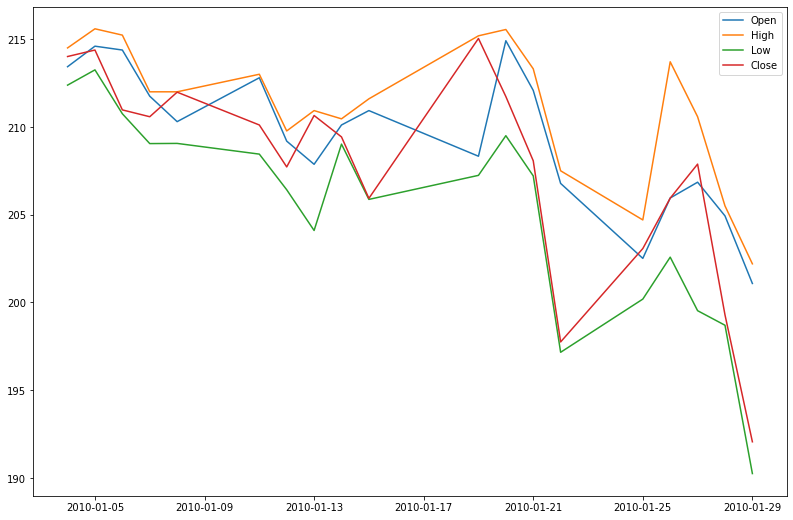

In [59]:
#Plot open, high, low, and close for January 2010 on the same plot
plt.subplots(figsize=(13.5, 9))
plt.plot(apple.loc['2010-01'].index, apple.loc['2010-01'].Open, label='Open')
plt.plot(apple.loc['2010-01'].index, apple.loc['2010-01'].High, label='High')
plt.plot(apple.loc['2010-01'].index, apple.loc['2010-01'].Low, label='Low')
plt.plot(apple.loc['2010-01'].index, apple.loc['2010-01'].Close, label='Close')
plt.legend()